# **MÓDULO 34 - Regressão: Conceitos Avançados**

Para essa atividade vocês trabalharão com a mesma base que usamos na aula, para previsão do aluguel.

Durante a aula montamos um modelo de regressão polinomial utilizando a variavel Valor Condominio para prever a variavel valor aluguel. Nessa atividade vocês devem escolher outra váriavel dessa base para realizar a previsão do valor do aluguel.


# 1 - Realize a importação das bibliotecas necessárias, carrega a base de dados e separe em X e Y, selecionando uma das váriaveis para X não sendo a usada durante a aula.

In [33]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
df_aluguel = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')
df_aluguel

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
...,...,...,...,...,...,...,...
7198,25000,7500,627,4,5,4,6
7199,25000,4600,364,4,2,1,0
7200,25000,3700,266,3,4,3,7
7201,25000,6000,600,4,5,4,8


In [35]:
y = df_aluguel['Valor_Aluguel']
x = df_aluguel['Metragem']

# 2 - Faça o procecssamento dos dados utilizando o Polynomial Feature, com degree = 2.

In [52]:
poly_features = PolynomialFeatures(degree=2)
x_poly = poly_features.fit_transform(x.values.reshape(-1, 1))

In [53]:
x_poly

array([[1.0000e+00, 4.8000e+01, 2.3040e+03],
       [1.0000e+00, 5.0000e+01, 2.5000e+03],
       [1.0000e+00, 4.0000e+01, 1.6000e+03],
       ...,
       [1.0000e+00, 2.6600e+02, 7.0756e+04],
       [1.0000e+00, 6.0000e+02, 3.6000e+05],
       [1.0000e+00, 2.4800e+02, 6.1504e+04]])

# 3 - Separe os dados em treino e teste e realize o treinamento do modelo.

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(x_poly, y, test_size=0.2, random_state=0)

In [55]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

4 - Faça as previsões para a base de teste e avalie os resultados obtidos, não se esqueça de plotar o gráfico da regressão.

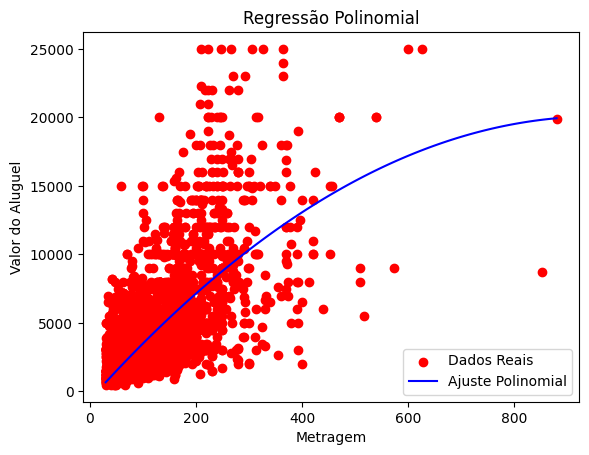

In [72]:
y_pred = model.predict(X_test)

# Grafico de regressão Polinomial
x_range =np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)
y_range_pred = model.predict(x_range_poly)

plt.scatter(x, y, color='red', label = 'Dados Reais')
plt.plot(x_range, y_range_pred, color='blue', label = 'Ajuste Polinomial')
plt.xlabel('Metragem')
plt.ylabel('Valor do Aluguel')
plt.title('Regressão Polinomial')
plt.legend()
plt.show()

In [57]:
r2 = r2_score(Y_test, y_pred)
print(f'R²: {r2}')

R²: 0.542346772768313


Com o R² podemos verificar um valor significativo bom mas não relevante.
O grafico podemos ver quase uma linha seguindo os dados reais.

# 5 - Refaça os passos anteriores, rodando um novo modelo, porém testando agora na fase de processamento o degree = 4. Avalie se o resultado desse novo modelo está superior ao anterior.

In [73]:
poly_degree4 = PolynomialFeatures(degree=4)
x_poly_4 = poly_degree4.fit_transform(x.values.reshape(-1, 1))

In [74]:
x_poly_4

array([[1.00000000e+00, 4.80000000e+01, 2.30400000e+03, 1.10592000e+05,
        5.30841600e+06],
       [1.00000000e+00, 5.00000000e+01, 2.50000000e+03, 1.25000000e+05,
        6.25000000e+06],
       [1.00000000e+00, 4.00000000e+01, 1.60000000e+03, 6.40000000e+04,
        2.56000000e+06],
       ...,
       [1.00000000e+00, 2.66000000e+02, 7.07560000e+04, 1.88210960e+07,
        5.00641154e+09],
       [1.00000000e+00, 6.00000000e+02, 3.60000000e+05, 2.16000000e+08,
        1.29600000e+11],
       [1.00000000e+00, 2.48000000e+02, 6.15040000e+04, 1.52529920e+07,
        3.78274202e+09]])

In [75]:
X_train_pol4, X_test_pol4, Y_train_pol4, Y_test_pol4 = train_test_split(x_poly_4, y, test_size=0.2, random_state=0)

In [76]:
model_poly4 = LinearRegression()
model_poly4.fit(X_train_pol4, Y_train_pol4)

LinearRegression()

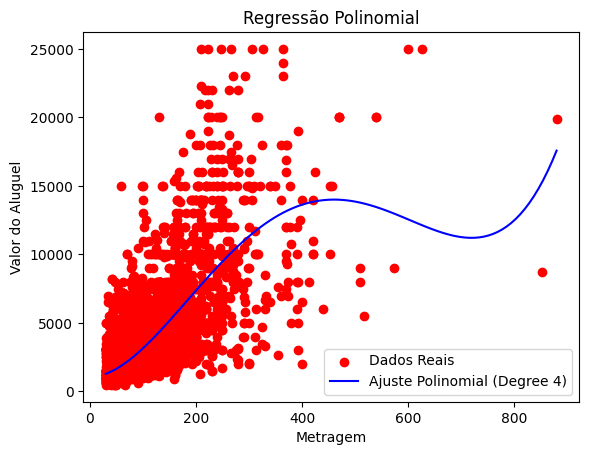

In [79]:
y_pred_poly4 = model_poly4.predict(X_test_pol4)

# Grafico de regressão Polinomial
x_range =np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
x_range_poly4 = poly_degree4.transform(x_range) # Usar poly_degree4 para degree=4
y_range_pred = model_poly4.predict(x_range_poly4) # Usar .predict() e o x_range_poly4

plt.scatter(x, y, color='red', label = 'Dados Reais')
plt.plot(x_range, y_range_pred, color='blue', label = 'Ajuste Polinomial (Degree 4)')
plt.xlabel('Metragem')
plt.ylabel('Valor do Aluguel')
plt.title('Regressão Polinomial')
plt.legend()
plt.show()

In [80]:
r2 = r2_score(Y_test_pol4, Y_test_pol4)
print(f'R²: {r2}')

R²: 1.0


Podemos ver um R² perfeito ou um Overfitting por conta que de degree = 4 pode buscar muitos ruidos

# 6 - Explique com suas palavras o conceito e a diferença entre Elastic Net, Ridge e Lasso.
Minimo: 4 linhas.

Ridge reduz todos os coeficientes, mas nunca os zera; é ótimo para lidar com multicolinearidade.
Lasso reduz e também zera coeficientes, funcionando como seleção de variáveis.
Ridge usa penalização L2 (quadrática), Lasso usa L1 (valor absoluto).
Elastic Net combina L1 e L2, equilibrando suavização e seleção.